In [2]:
!mkdir -p ~/.kaggle # Download dataset from kaggle by using kaggle API
!cp kaggle.json ~/.kaggle/


In [3]:
!kaggle datasets download -d yasserhessein/heartbeat # kaggle API

Dataset URL: https://www.kaggle.com/datasets/yasserhessein/heartbeat
License(s): unknown
 98% 97.0M/98.8M [00:04<00:00, 29.5MB/s]
100% 98.8M/98.8M [00:04<00:00, 23.0MB/s]


**Unzip Data**

In [4]:
import zipfile

with zipfile.ZipFile('/content/heartbeat.zip', 'r') as zip_ref:
  zip_ref.extractall('/content')

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import zipfile

with zipfile.ZipFile('/content/heartbeat.zip', 'r') as zip_ref:
  zip_ref.extractall('/content')

**Import Required Libraries**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import cv2  # For processing images in the 2D CNN implementation
import os


**Split dataset into train and test**

In [7]:
train_data = pd.read_csv('mitbih_train.csv', header=None)
test_data = pd.read_csv('mitbih_test.csv', header=None)

X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values


**Data Preprocessing**
**Standardization: Standardize the features.**
**Reshape Data: Reshape the data to fit the CNN model.**
**One-Hot Encoding: Encode the labels.**

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)


**Implement the CNN model as per the the medium documentation**.
**1D CNN Implementation----> Data Preprocessing**

In [9]:
model_1d = Sequential()

model_1d.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)))
model_1d.add(BatchNormalization())
model_1d.add(MaxPooling1D(pool_size=2))
model_1d.add(Dropout(0.2))

model_1d.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model_1d.add(BatchNormalization())
model_1d.add(MaxPooling1D(pool_size=2))
model_1d.add(Dropout(0.2))

model_1d.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_1d.add(BatchNormalization())
model_1d.add(MaxPooling1D(pool_size=2))
model_1d.add(Dropout(0.2))

model_1d.add(Flatten())

model_1d.add(Dense(128, activation='relu'))
model_1d.add(Dropout(0.3))
model_1d.add(Dense(5, activation='softmax'))

model_1d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Model Training**-->
**Train the model on the preprocessed data.**

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_1d = model_1d.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/20
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.9944 - loss: 0.0232 - val_accuracy: 0.1387 - val_loss: 9.4899
Epoch 2/20
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 1.0000 - loss: 4.6379e-07 - val_accuracy: 0.1387 - val_loss: 9.8155
Epoch 3/20
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 1.0000 - loss: 5.8653e-07 - val_accuracy: 0.1388 - val_loss: 10.4858
Epoch 4/20
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 1.0000 - loss: 6.1742e-08 - val_accuracy: 0.1388 - val_loss: 11.0860
Epoch 5/20
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 1.0000 - loss: 2.1060e-08 - val_accuracy: 0.1388 - val_loss: 11.9954
Epoch 6/20
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 1.0000 - loss: 7.9766e-09 - val_accuracy: 0.1387 - val_loss: 13.9902


**Evaluation-->**
**Evaluate the model using the test dataset and visualize the results.**

In [11]:
loss, accuracy = model_1d.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')




685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9837 - loss: 0.1940
Test Accuracy: 82.76%


**Confusion Matrix and Classification Report**

In [12]:
y_pred_1d = model_1d.predict(X_test)
y_pred_classes_1d = np.argmax(y_pred_1d, axis=1)
y_true_1d = np.argmax(y_test, axis=1)

print(confusion_matrix(y_true_1d, y_pred_classes_1d))
print(classification_report(y_true_1d, y_pred_classes_1d))

685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[[18118     0     0     0     0]
 [  556     0     0     0     0]
 [ 1448     0     0     0     0]
 [  162     0     0     0     0]
 [ 1608     0     0     0     0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     18118
           1       0.00      0.00      0.00       556
           2       0.00      0.00      0.00      1448
           3       0.00      0.00      0.00       162
           4       0.00      0.00      0.00      1608

    accuracy                           0.83     21892
   macro avg       0.17      0.20      0.18     21892
weighted avg       0.68      0.83      0.75     21892



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Visualization**

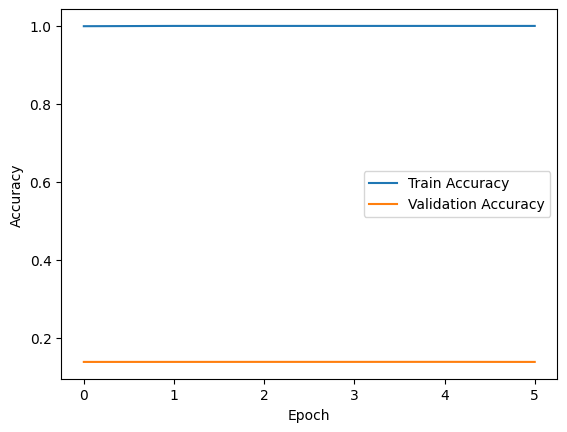

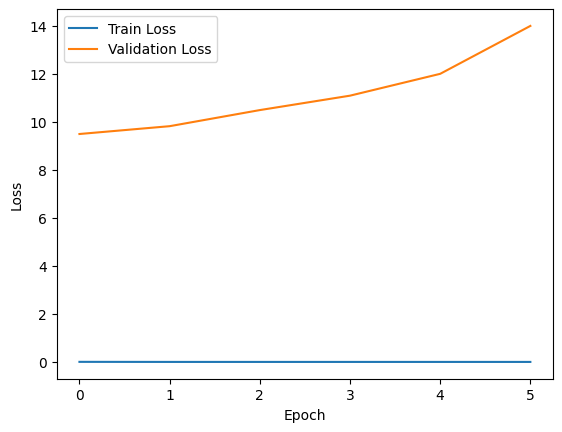

In [13]:
plt.plot(history_1d.history['accuracy'], label='Train Accuracy')
plt.plot(history_1d.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_1d.history['loss'], label='Train Loss')
plt.plot(history_1d.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**2D CNN Implementation--->Data Preprocessing**

In [14]:
import os
import numpy as np
import cv2
from multiprocessing import Pool, cpu_count

def save_ecg_image(args):
    ecg_signal, label, img_path = args
    img = np.zeros((200, 200), dtype=np.uint8)  # Create a blank image (adjust size as needed)
    ecg_signal = np.interp(ecg_signal, (np.min(ecg_signal), np.max(ecg_signal)), (0, 255))
    cv2.polylines(img, [np.int32(np.column_stack((np.linspace(0, img.shape[1]-1, len(ecg_signal)), ecg_signal)))], isClosed=False, color=255)
    cv2.imwrite(img_path, img)

def create_ecg_images(X, y, folder_prefix):
    # Ensure the main directory exists
    os.makedirs(folder_prefix, exist_ok=True)

    # Create directories for each class label
    for i in range(5):
        os.makedirs(os.path.join(folder_prefix, str(i)), exist_ok=True)

    # Prepare arguments for multiprocessing
    args_list = []
    for index in range(X.shape[0]):
        ecg_signal = X[index]
        label = np.argmax(y[index])
        img_path = os.path.join(folder_prefix, str(label), f'img_{index}.png')
        args_list.append((ecg_signal, label, img_path))

    # Use multiprocessing to save images in parallel
    with Pool(cpu_count()) as pool:
        pool.map(save_ecg_image, args_list)

# Generate images using the optimized function
create_ecg_images(X_train, y_train, 'train_images')
create_ecg_images(X_test, y_test, 'test_images')


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


**Load and Resize Images for 2D CNN**

In [15]:
def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []
    for category in range(5):
        path = os.path.join(folder, str(category))
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(category)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

X_train_2d, y_train_2d = load_images_from_folder('train_images')
X_test_2d, y_test_2d = load_images_from_folder('test_images')

X_train_2d = X_train_2d.reshape(X_train_2d.shape[0], 64, 64, 1)
X_test_2d = X_test_2d.reshape(X_test_2d.shape[0], 64, 64, 1)

y_train_2d = to_categorical(y_train_2d, num_classes=5)
y_test_2d = to_categorical(y_test_2d, num_classes=5)


**Model Architecture**

In [16]:
model_2d = Sequential()

model_2d.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64, 64, 1)))
model_2d.add(BatchNormalization())
model_2d.add(MaxPooling2D(pool_size=(2, 2)))
model_2d.add(Dropout(0.2))

model_2d.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model_2d.add(BatchNormalization())
model_2d.add(MaxPooling2D(pool_size=(2, 2)))
model_2d.add(Dropout(0.2))

model_2d.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model_2d.add(BatchNormalization())
model_2d.add(MaxPooling2D(pool_size=(2, 2)))
model_2d.add(Dropout(0.2))

model_2d.add(Flatten())

model_2d.add(Dense(128, activation='relu'))
model_2d.add(Dropout(0.3))
model_2d.add(Dense(5, activation='softmax'))

model_2d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Model Training**

In [17]:
history_2d = model_2d.fit(X_train_2d, y_train_2d, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/20
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 34s 10ms/step - accuracy: 0.9978 - loss: 0.0082 - val_accuracy: 0.1387 - val_loss: 58.8821
Epoch 2/20
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 1.0000 - loss: 3.8196e-12 - val_accuracy: 0.1387 - val_loss: 58.8361
Epoch 3/20
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 1.0000 - loss: 7.4799e-11 - val_accuracy: 0.1387 - val_loss: 58.9017
Epoch 4/20
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.1387 - val_loss: 58.9942
Epoch 5/20
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 1.0000 - loss: 3.5328e-11 - val_accuracy: 0.1387 - val_loss: 58.8548


**Evaluation**

In [18]:
loss, accuracy = model_2d.evaluate(X_test_2d, y_test_2d)
print(f'Test Accuracy: {accuracy*100:.2f}%')

y_pred_2d = model_2d.predict(X_test_2d)
y_pred_classes_2d = np.argmax(y_pred_2d, axis=1)
y_true_2d = np.argmax(y_test_2d, axis=1)

print(confusion_matrix(y_true_2d, y_pred_classes_2d))
print(classification_report(y_true_2d, y_pred_classes_2d))


685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9837 - loss: 1.1096
Test Accuracy: 82.76%
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[[18118     0     0     0     0]
 [  556     0     0     0     0]
 [ 1448     0     0     0     0]
 [  162     0     0     0     0]
 [ 1608     0     0     0     0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     18118
           1       0.00      0.00      0.00       556
           2       0.00      0.00      0.00      1448
           3       0.00      0.00      0.00       162
           4       0.00      0.00      0.00      1608

    accuracy                           0.83     21892
   macro avg       0.17      0.20      0.18     21892
weighted avg       0.68      0.83      0.75     21892



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
